In [2]:
#Install if necessary
#!pip install kmodes
#!pip install statsmodels
!pip install shap


Defaulting to user installation because normal site-packages is not writeable
  Using cached shap-0.47.2-cp313-cp313-win_amd64.whl
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.2-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl.metadata (5.0 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.61.2-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl (30.3 MB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\lewis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


C:\Users\lewis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)


# Load the dataset
df = pd.read_csv('C:/Users/lewis/Documents/COMP6940/GRP 4 Hotel Cancellation Prediction/Data/Processed/preprocessed_hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,days_before_arrival
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,no agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,no agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,no agent,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,-1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,has agent,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,-1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,has agent,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,-2


In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
# Convert date columns to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [9]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int64
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'days_before_arrival'],
      dtype='object')

## Booking Cancellation Analysis

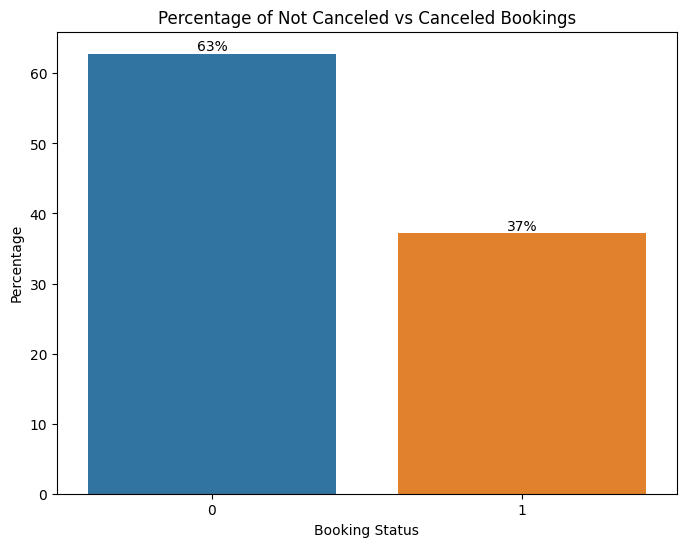

In [7]:
# Calculate cancellation percentage
cancellation_percentage = df['is_canceled'].value_counts(normalize=True) * 100

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cancellation_percentage.index, y=cancellation_percentage.values, hue=cancellation_percentage.index, legend=False)
plt.title('Percentage of Not Canceled vs Canceled Bookings')
plt.xlabel('Booking Status')
plt.ylabel('Percentage')

# Add data labels
for i, v in enumerate(cancellation_percentage.values):
    plt.text(i, v, f'{v:.0f}%', ha='center', va='bottom')

plt.show()


The bar chart shows the distribution of canceled and not canceled bookings in the dataset. A significant portion of bookings were not canceled, indicating a relatively high booking success rate. However, for the percentage of bookings that were canceled, there is need for further investigation into the factors contributing to cancellations. Further analysis could focus on identifying these factors and developing strategies to mitigate cancellations.




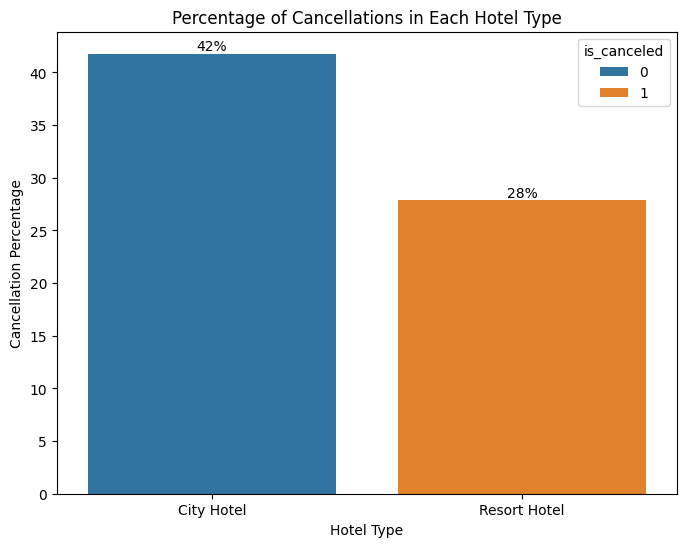

In [53]:
# Replace 0 and 1 in 'hotel' column with 'City Hotel' and 'Resort Hotel' respectively
df['hotel'] = df['hotel'].replace({0: 'City Hotel', 1: 'Resort Hotel'})

# Group by hotel type and calculate cancellation percentage
hotel_cancellation_percentage = df.groupby('hotel')['is_canceled'].mean() * 100

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=hotel_cancellation_percentage.index, y=hotel_cancellation_percentage.values, hue=cancellation_percentage.index)
plt.title('Percentage of Cancellations in Each Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Percentage')

# Add data labels
for i, v in enumerate(hotel_cancellation_percentage.values):
    plt.text(i, v, f'{v:.0f}%', ha='center', va='bottom')

plt.show()



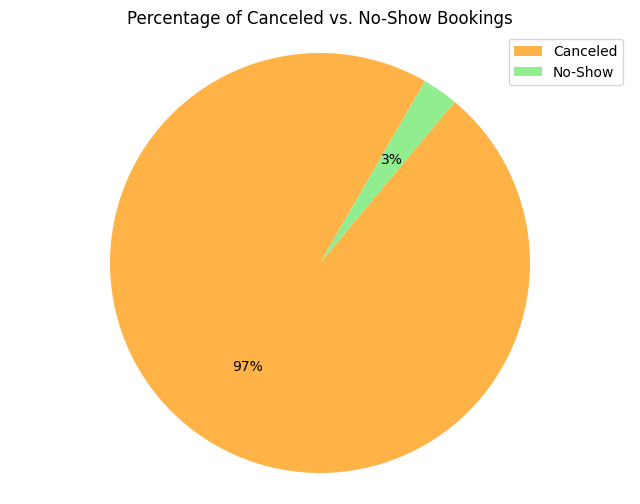

In [13]:
# Create a cross-tabulation of reservation status and is_canceled
reservation_status_counts = pd.crosstab(df['reservation_status'], df['is_canceled'])

# Calculate the total number of cancellations and no-shows
total_cancellations = reservation_status_counts.loc['Canceled',:].sum()
total_no_shows = reservation_status_counts.loc['No-Show',:].sum()

# Pie chart
sizes = [total_cancellations, total_no_shows]
colors = ['#FFB347', '#90EE90']
plt.figure(figsize=(8, 6))
plt.pie(sizes, autopct='%1.0f%%', startangle=60, colors=colors)
plt.title('Percentage of Canceled vs. No-Show Bookings')
plt.axis('equal')
plt.legend(['Canceled', 'No-Show'])
plt.show()

Majority of absences by guests are cancellations prior to arrival rather than no-shows therefore the main investigation would be based on the cancellations

### **Numerical Feature Analysis**

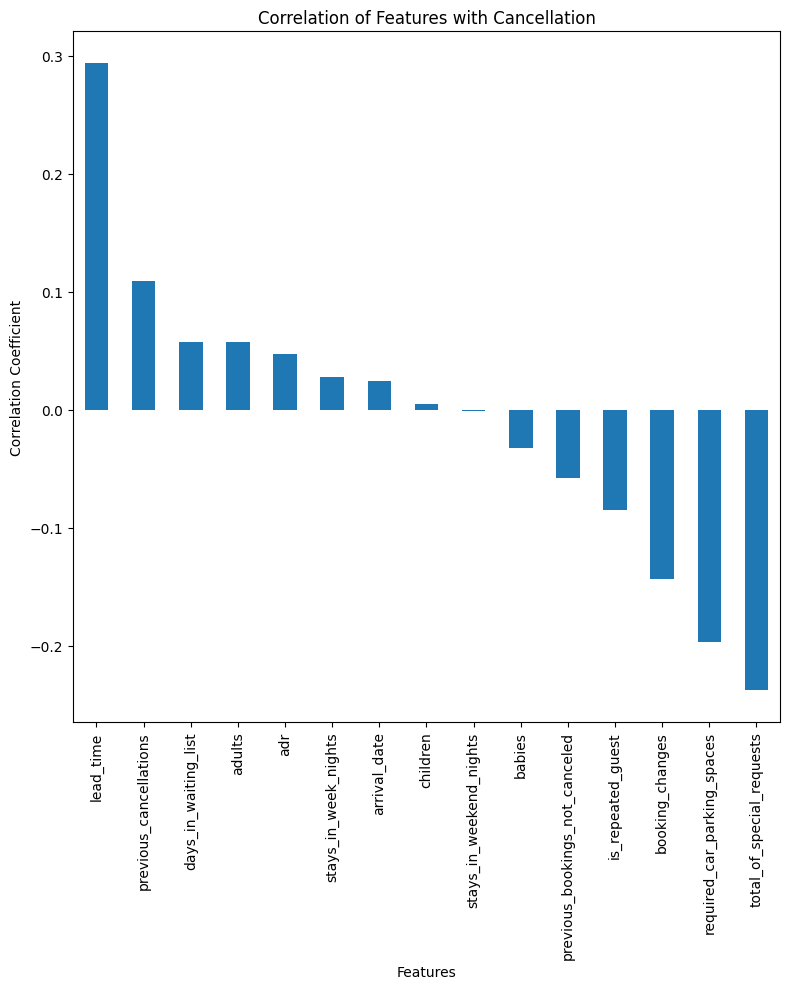

In [14]:
# Select numerical features and target variable
numerical_features = ['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests','arrival_date']
target_variable = 'is_canceled'

# Compute the correlation matrix
correlation_matrix = df[numerical_features + [target_variable]].corr()

# Select the target variable correlations
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)

# Sort correlations in descending order
correlation_with_target = correlation_with_target.sort_values(ascending=False)

# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
correlation_with_target.plot(kind='bar')
plt.title('Correlation of Features with Cancellation')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Correlation Analysis of Cancellation Prediction

The correlation analysis reveals key factors influencing booking cancellations.  Let's examine the top and bottom two features:

**Top 2 (Positive) Correlations:**

1. **`lead_time`:** A strong positive correlation suggests that longer lead times are associated with a higher likelihood of cancellation. This could be due to guests having more time to change their plans or find alternative options.

2. **`previous_cancellations`:**  A positive correlation indicates that guests with a history of cancellations are more likely to cancel future bookings. This highlights the importance of identifying and potentially managing high-risk customers.


**Bottom 2 (Negative) Correlations:**

To gain a comprehensive understanding, we must also analyze the features exhibiting the two lowest (most negative) correlation coefficients. These features **required_car_parking_spaces** and **total_of_special_requests** showed negative correlations, implying guests with special needs are less likely to cancel

N.B **arrival_date_year** and **children** count showed minimal impact on cancellations


### **Categorical Feature Analysis**

In [15]:
# Calculate mean lead time for canceled and not canceled
mean_lead_time_canceled = round(df[df['is_canceled'] == 1]['lead_time'].mean())
mean_lead_time_not_canceled = round(df[df['is_canceled'] == 0]['lead_time'].mean())

print("Mean lead time for canceled bookings: ", mean_lead_time_canceled)
print("Mean lead time for not canceled bookings: ", mean_lead_time_not_canceled)

Mean lead time for canceled bookings:  145
Mean lead time for not canceled bookings:  80


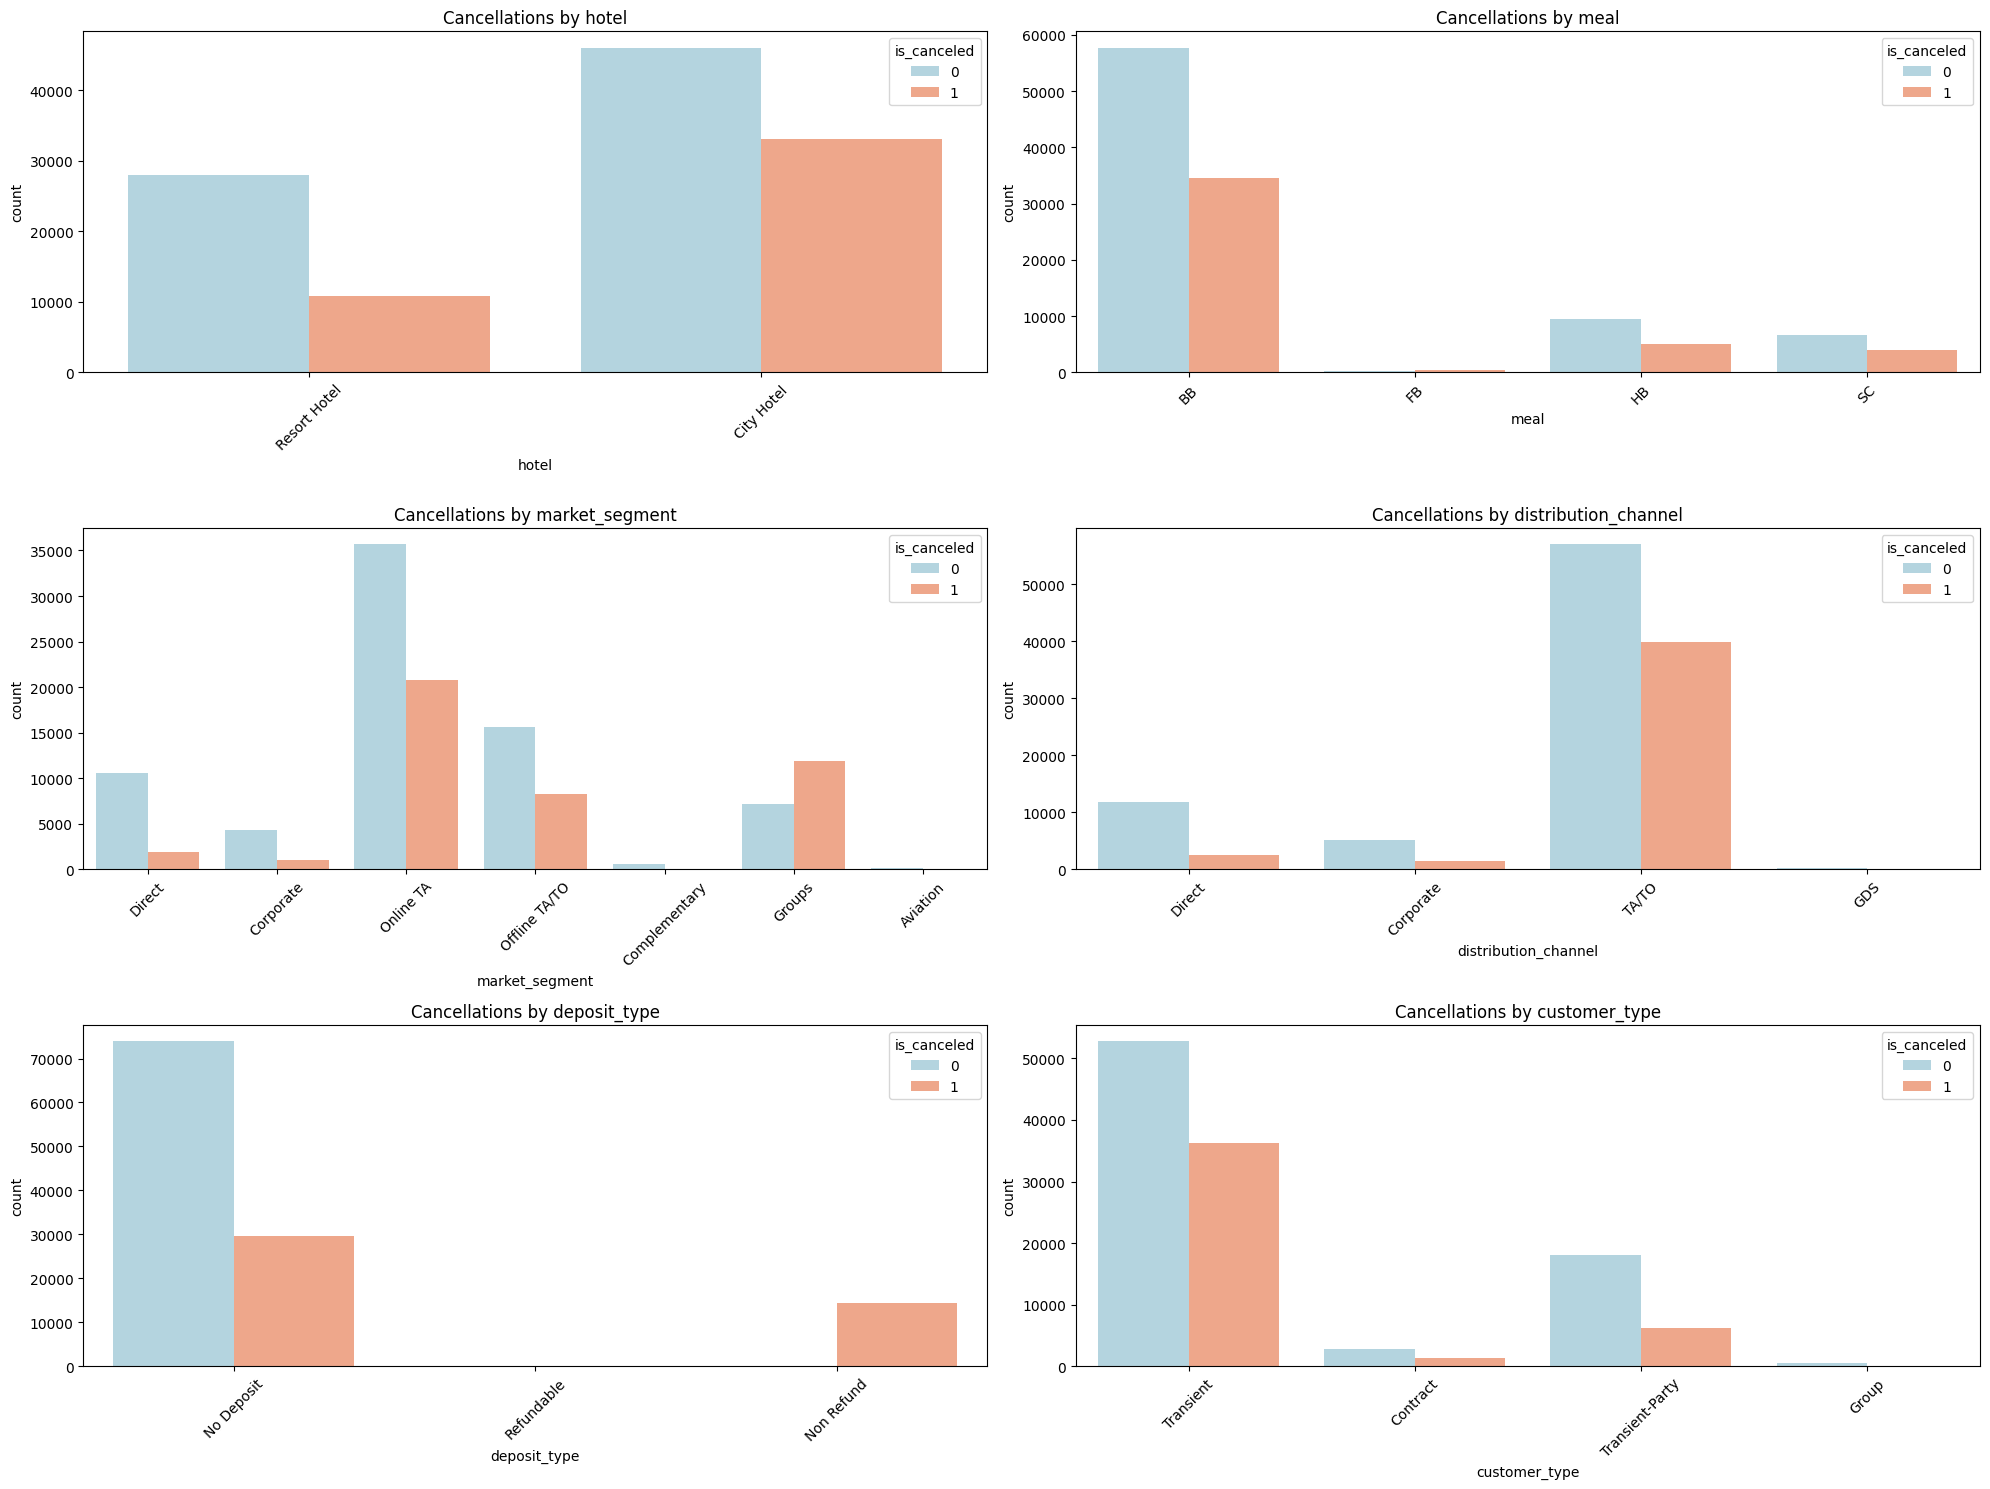

In [16]:
# Create count plots for categorical features
cat_features = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                'deposit_type', 'customer_type']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, hue='is_canceled', data=df, palette=['#ADD8E6','#FFA07A']) #Pastel blue and pastel orange
    plt.title(f'Cancellations by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()

In [11]:
print(df['deposit_type'].value_counts())

deposit_type
No Deposit    103435
Non Refund     14439
Refundable       162
Name: count, dtype: int64


In [12]:
print(df['distribution_channel'].value_counts())

distribution_channel
TA/TO        96901
Direct       14338
Corporate     6604
GDS            193
Name: count, dtype: int64


In [13]:
print(df['market_segment'].value_counts())

market_segment
Online TA        56391
Offline TA/TO    23924
Groups           18990
Direct           12507
Corporate         5267
Complementary      722
Aviation           235
Name: count, dtype: int64


The count plots for categorical features provided valuable insights:
- **Hotel Type**: City hotels had higher cancellation rates than resort hotels
- **Meal Plan**: Room-only bookings (BB) had higher cancellations than full board
- **Market Segment**: Online TA (Travel Agents) showed highest cancellation rates
- **Distribution Channel**: Direct bookings had lower cancellations than TA/TO
- **Deposit Type**: Non-refundable deposits had significantly lower cancellations
- **Customer Type**: Transient customers had higher cancellations than contract/group


N.B The absence of certain categories in the plots (e.g., 'Refundable' deposit type or 'GDS' distribution channel shown above) can be due to several factors:

1. **Data Sparsity**: Some categories may have very few or no instances in the dataset, making them invisible in the plots
2. **Data Cleaning**: These categories might have been removed during preprocessing if they contained missing or invalid data
3. **Business Reality**: Some categories might genuinely be rare in the hotel's operations (e.g., GDS channels might not be commonly used)
4. **Data Collection**: The hotel might not have collected data for certain categories during the period covered by the dataset


### **Time Series Analysis**

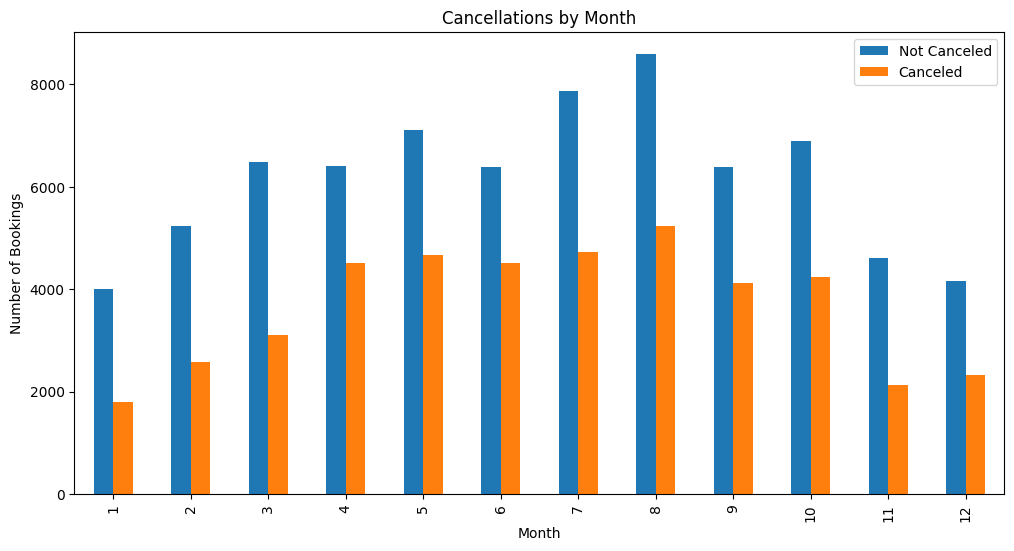

In [17]:
# Monthly cancellation rates
df['arrival_month'] = df['arrival_date'].dt.month
monthly_cancellations = df.groupby(['arrival_month', 'is_canceled']).size().unstack()
monthly_cancellations.plot(kind='bar', figsize=(12,6))
plt.title('Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(['Not Canceled', 'Canceled'])

### Analysis of Monthly Cancellation Rates

Peak travel months: Summer months(usually April-August) and December

Off-peak travel months: January-March, September-November

The bar chart reveals several key insights about cancellations for months throughout the year:

1. **Seasonal Trends**:
- Higher cancellation rates are observed during peak travel months
- Lower cancellation rates are seen in off-peak months

2. **Booking Behavior**:
- The total number of bookings (canceled + not canceled) is highest during summer months, indicating increased demand
- The proportion of cancellations relative to total bookings remains relatively consistent across months

3 and 4 are insights on how this bar chart analysis can help with market research and hotel campaign restructuring

3. **Business Implications**:
- The hotel should consider implementing stricter cancellation policies during peak seasons
- Revenue management strategies could be adjusted based on these seasonal patterns
- Marketing efforts could be intensified during low-cancellation months to maximize occupancy

4. **Operational Considerations**:
- Staffing and resource allocation could be optimized based on these cancellation patterns
- Inventory management should account for higher cancellation rates during peak months


### **Cancellation Rate by Lead Time**

Text(0, 0.5, 'Cancellation Rate')

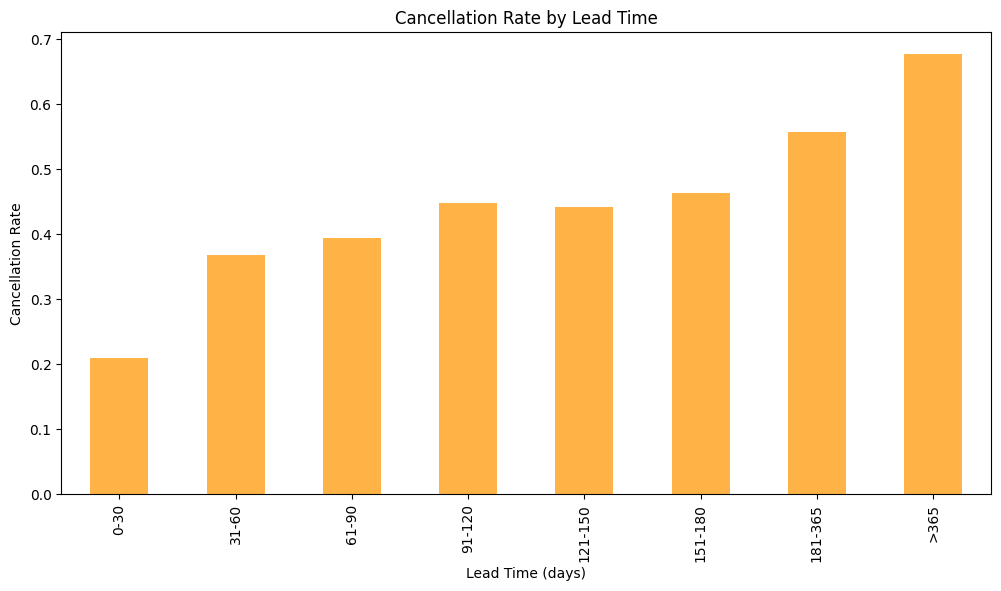

In [18]:
# Create bins for lead time
df['lead_time_bins'] = pd.cut(df['lead_time'],
                             bins=[0, 30, 60, 90, 120, 150, 180, 365, 730],
                             labels=['0-30', '31-60', '61-90', '91-120',
                                    '121-150', '151-180', '181-365', '>365'])

# Plot cancellation rate by lead time bins
cancellation_rate = df.groupby('lead_time_bins',observed=False)['is_canceled'].mean()
cancellation_rate.plot(kind='bar', figsize=(12,6), color='#FFB347')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate')

### Analysis of Cancellation Rates by Lead Time

Before we analyse the chart lets better understand its feature: Cancellation Rate

Cancellation rate represents the percentage of bookings that are canceled out of the total bookings made. It's calculated as:

**Cancellation Rate = (Number of Canceled Bookings / Total Number of Bookings) * 100**

N.B In the bar graph its represented as (Number of Canceled Bookings / Total Number of Bookings)

This metric is crucial for hotels as it:
- Helps predict potential revenue loss
- Informs overbooking strategies
- Guides cancellation policy decisions
- Assists in resource allocation and planning

A higher cancellation rate indicates more uncertainty in bookings, while a lower rate suggests more reliable reservations.

The bar chart reveals important insights about the relationship between lead time and cancellation rates:

1. **General Trend**:
- Cancellation rates increase significantly as lead time increases
- Bookings made more than 365 days in advance have the highest cancellation rate

2. **Key Observations**:
- Short-term bookings (0-30 days) have the lowest cancellation rates (typically under 20%), likely because these are more urgent, planned trips
- The 31-60 days range shows a moderate increase in cancellations, suggesting this is when some travelers start reconsidering their plans
- Between 61-180 days, cancellation rates rise steadily, indicating that the longer the booking window, the more likely plans are to change
- The 181-365 days range shows a significant jump in cancellations, possibly due to changing personal circumstances or finding better deals elsewhere
- The >365 days category has the highest cancellation rate (over 50%), likely because plans made this far in advance are most susceptible to changes

3 and 4 are insights on how this bar chart analysis can help with market research and hotel campaign restructuring

3. **Business Implications**:
- The hotel could implement different cancellation policies based on lead time
- Early bookings might require larger deposits to reduce cancellations
- Marketing efforts could focus on last-minute bookings which have lower cancellation rates

4. **Operational Considerations**:
- Revenue management should account for higher cancellation rates in long-lead bookings
- Overbooking strategies could be adjusted based on lead time
- Customer communication should be intensified for long-lead bookings to maintain engagement



### **Cancellation Prediction Models**

In [19]:
df1 = df

In [20]:
#df1 = pd.get_dummies(df1, columns=['arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'agent', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'])


In [20]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,days_before_arrival,arrival_month,lead_time_bins
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,no agent,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0,7,181-365
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,no agent,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0,7,NaN
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,no agent,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,-1,7,0-30
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,has agent,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,-1,7,0-30
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,has agent,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,-2,7,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118031,City Hotel,0,23,2017,8,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,has agent,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,-7,8,0-30
118032,City Hotel,0,102,2017,8,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,has agent,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,-7,8,91-120
118033,City Hotel,0,34,2017,8,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,has agent,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,-7,8,31-60
118034,City Hotel,0,109,2017,8,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,has agent,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,-7,8,91-120


In [21]:
# Label encode the country column
le = LabelEncoder()
# Label encode the categorical columns
for column in df1.columns:
    if df1[column].dtype == type(object):
        le = LabelEncoder()
        df1[column] = le.fit_transform(df1[column])

#df1['country'] = le.fit_transform(df1['country'])
#df1['hotel'] = le.fit_transform(df1['hotel'])

In [22]:
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,days_before_arrival,arrival_month,lead_time_bins
0,1,0,342,2015,7,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,3,0,1,0,2,0.00,0,0,1,2015-07-01,2015-07-01,0,7,181-365
1,1,0,737,2015,7,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,4,0,1,0,2,0.00,0,0,1,2015-07-01,2015-07-01,0,7,NaN
2,1,0,7,2015,7,27,1,0,1,1,0,0,0,59,3,1,0,0,0,0,2,0,0,1,0,2,75.00,0,0,1,2015-07-02,2015-07-01,-1,7,0-30
3,1,0,13,2015,7,27,1,0,1,1,0,0,0,59,2,0,0,0,0,0,0,0,0,0,0,2,75.00,0,0,1,2015-07-02,2015-07-01,-1,7,0-30
4,1,0,14,2015,7,27,1,0,2,2,0,0,0,59,6,3,0,0,0,0,0,0,0,0,0,2,98.00,0,1,1,2015-07-03,2015-07-01,-2,7,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118031,0,0,23,2017,8,35,30,2,5,2,0,0,0,15,5,3,0,0,0,0,0,0,0,0,0,2,96.14,0,0,1,2017-09-06,2017-08-30,-7,8,0-30
118032,0,0,102,2017,8,35,31,2,5,3,0,0,0,56,6,3,0,0,0,4,4,0,0,0,0,2,225.43,0,2,1,2017-09-07,2017-08-31,-7,8,91-120
118033,0,0,34,2017,8,35,31,2,5,2,0,0,0,43,6,3,0,0,0,3,3,0,0,0,0,2,157.71,0,4,1,2017-09-07,2017-08-31,-7,8,31-60
118034,0,0,109,2017,8,35,31,2,5,2,0,0,0,59,6,3,0,0,0,0,0,0,0,0,0,2,104.40,0,0,1,2017-09-07,2017-08-31,-7,8,91-120


In [23]:
# Check if any columns are type category
category_columns = df1.select_dtypes(include=['category']).columns
print("Category columns: ", category_columns)

Category columns:  Index(['lead_time_bins'], dtype='object')


In [24]:
#Remove lead_time_bins
df1 = df1.select_dtypes(exclude=['category'])
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,days_before_arrival,arrival_month
0,1,0,342,2015,7,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,3,0,1,0,2,0.00,0,0,1,2015-07-01,2015-07-01,0,7
1,1,0,737,2015,7,27,1,0,0,2,0,0,0,135,3,1,0,0,0,2,2,4,0,1,0,2,0.00,0,0,1,2015-07-01,2015-07-01,0,7
2,1,0,7,2015,7,27,1,0,1,1,0,0,0,59,3,1,0,0,0,0,2,0,0,1,0,2,75.00,0,0,1,2015-07-02,2015-07-01,-1,7
3,1,0,13,2015,7,27,1,0,1,1,0,0,0,59,2,0,0,0,0,0,0,0,0,0,0,2,75.00,0,0,1,2015-07-02,2015-07-01,-1,7
4,1,0,14,2015,7,27,1,0,2,2,0,0,0,59,6,3,0,0,0,0,0,0,0,0,0,2,98.00,0,1,1,2015-07-03,2015-07-01,-2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118031,0,0,23,2017,8,35,30,2,5,2,0,0,0,15,5,3,0,0,0,0,0,0,0,0,0,2,96.14,0,0,1,2017-09-06,2017-08-30,-7,8
118032,0,0,102,2017,8,35,31,2,5,3,0,0,0,56,6,3,0,0,0,4,4,0,0,0,0,2,225.43,0,2,1,2017-09-07,2017-08-31,-7,8
118033,0,0,34,2017,8,35,31,2,5,2,0,0,0,43,6,3,0,0,0,3,3,0,0,0,0,2,157.71,0,4,1,2017-09-07,2017-08-31,-7,8
118034,0,0,109,2017,8,35,31,2,5,2,0,0,0,59,6,3,0,0,0,0,0,0,0,0,0,2,104.40,0,0,1,2017-09-07,2017-08-31,-7,8


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118036 entries, 0 to 118035
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118036 non-null  int64         
 1   is_canceled                     118036 non-null  int64         
 2   lead_time                       118036 non-null  int64         
 3   arrival_date_year               118036 non-null  int64         
 4   arrival_date_month              118036 non-null  int64         
 5   arrival_date_week_number        118036 non-null  int64         
 6   arrival_date_day_of_month       118036 non-null  int64         
 7   stays_in_weekend_nights         118036 non-null  int64         
 8   stays_in_week_nights            118036 non-null  int64         
 9   adults                          118036 non-null  int64         
 10  children                        118036 non-null  int64  

In [24]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'arrival_date', 'days_before_arrival',
       'arrival_month', 'arrival_date_month_1', 'arrival_date_month_2',
       'arrival_date_month_3', 'arrival_date_month_4', 'arrival_date_month_5',
       'arrival_date_month_6', 'arrival_date_month_7', 'arrival_date_month_8',
       'arrival_date_month_9', 'arrival_date_month_10',
       'arrival_date_month_11', 'arrival_date_month_12', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'market_segment_Aviation',
       'market_segment_Complementar

In [25]:
X = df1.drop(columns=['is_canceled','reservation_status','country',
                     'reservation_status_date', 'arrival_date'])
y = df1['is_canceled']

In [26]:
# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

# Use SMOTE to balance the dataset by oversampling the minority class
X_sm, y_sm = smote.fit_resample(X, y)

# Split the balanced dataset into training and testing sets
# 80% of the data will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [27]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the fitted scaler to transform the testing data
X_test_scaled = scaler.transform(X_test)

In [28]:
# Define parameter grids for each model
# Define the parameter grid for hyperparameter tuning
param_grids = {
    # Parameters for Random Forest
    'RandomForest': {
        'n_estimators': [100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
        'max_features': ['sqrt']  # Number of features to consider when looking for the best split
    },
    # Parameters for Logistic Regression
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
        'solver': ['liblinear', 'lbfgs'],  # Algorithm to use in the optimization problem
        'penalty': ['l2']  # Used to specify the norm used in the penalization
    },
    # Parameters for Decision Tree
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
        'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
    }
}

# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# Store best models and results
best_models = {}
results = {}

for name in models:
    print(f"Tuning {name}...")
    grid = GridSearchCV(
        models[name],
        param_grids[name],
        cv=5,
        n_jobs=-1,
        scoring='roc_auc',  # or 'accuracy'
        verbose=1
    )
    grid.fit(X_train_scaled, y_train)
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test)
    y_proba = grid.predict_proba(X_test)[:, 1] if hasattr(grid, "predict_proba") else None
    results[name] = {
        'best_params': grid.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Test Accuracy: {results[name]['accuracy']:.4f}")
    print(f"Test ROC AUC: {results[name]['roc_auc']:.4f}")

# Compare results
results_df = pd.DataFrame(results).T
results_df

Tuning RandomForest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\lewis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\lewis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Best params for RandomForest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.9962
Test ROC AUC: 0.9971
Tuning LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\lewis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\lewis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Best params for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.8754
Test ROC AUC: 0.9065
Tuning DecisionTree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params for DecisionTree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Accuracy: 0.9962
Test ROC AUC: 0.9962


C:\Users\lewis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\lewis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,best_params,accuracy,roc_auc
RandomForest,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.996155,0.997147
LogisticRegression,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.875417,0.906498
DecisionTree,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.996155,0.996201


In [29]:
def evaluate_classifier(y_true, y_pred, y_pred_proba, title):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)

    # Print metrics
    print(f"\n{title} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

#### **Random Forest Classifier**

In [30]:
rf_clf = RandomForestClassifier(max_depth= None, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 200, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)
rf_pred_proba = rf_clf.predict_proba(X_test_scaled)[:, 1]
evaluate_classifier(y_test, rf_pred, rf_pred_proba, "Random Forest")
rf_auc = roc_auc_score(y_test, rf_pred_proba)


Random Forest Results:
Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9995
F1-score: 0.9995
AUC: 1.0000


#### **Logistic Regression**

In [31]:
lr_clf = LogisticRegression(random_state=42, C= 10, penalty= 'l2', solver = 'lbfgs')
lr_clf.fit(X_train_scaled, y_train)
lr_pred = lr_clf.predict(X_test_scaled)
lr_pred_proba = lr_clf.predict_proba(X_test_scaled)[:, 1]
evaluate_classifier(y_test, lr_pred, lr_pred_proba, "Logistic Regression")
lr_auc = roc_auc_score(y_test, lr_pred_proba)


Logistic Regression Results:
Accuracy: 0.9928
Precision: 0.9997
Recall: 0.9857
F1-score: 0.9926
AUC: 1.0000


#### **Decision Tree**

In [32]:
dt_clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 10, random_state=42)
dt_clf.fit(X_train_scaled, y_train)
dt_pred = dt_clf.predict(X_test_scaled)
dt_pred_proba = dt_clf.predict_proba(X_test_scaled)[:, 1]
evaluate_classifier(y_test, dt_pred, dt_pred_proba, "Decision Tree")
dt_auc = roc_auc_score(y_test, dt_pred_proba)


Decision Tree Results:
Accuracy: 0.9996
Precision: 0.9997
Recall: 0.9995
F1-score: 0.9996
AUC: 0.9998


In [33]:
results = pd.DataFrame({
    'Classifier': ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, rf_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, dt_pred)],
    'Precision': [precision_score(y_test, rf_pred), precision_score(y_test, lr_pred), precision_score(y_test, dt_pred)],
    'Recall': [recall_score(y_test, rf_pred), recall_score(y_test, lr_pred), recall_score(y_test, dt_pred)],
    'F1': [f1_score(y_test, rf_pred), f1_score(y_test, lr_pred), f1_score(y_test, dt_pred)],
    'AUC': [roc_auc_score(y_test, rf_pred_proba), roc_auc_score(y_test, lr_pred_proba), roc_auc_score(y_test, dt_pred_proba)]
})
results


,Classifier,Accuracy,Precision,Recall,F1,AUC
0,Random Forest,0.999494,0.999454,0.999522,0.999488,0.999994
1,Logistic Regression,0.992783,0.999654,0.985730,0.992643,0.999956
2,Decision Tree,0.999562,0.999659,0.999454,0.999556,0.999764


Based on the evaluation metrics (Accuracy, Precision, Recall, F1, and AUC), the Random Forest classifier appears to be the best model for this classification problem. It has the highest ROC-AUC among the three models which is the preferred metric for classification models because it considers both sensitivity and specificity, and is robust to class imbalance. 


**Model Comparison**:  
Let's visualize performance differences:

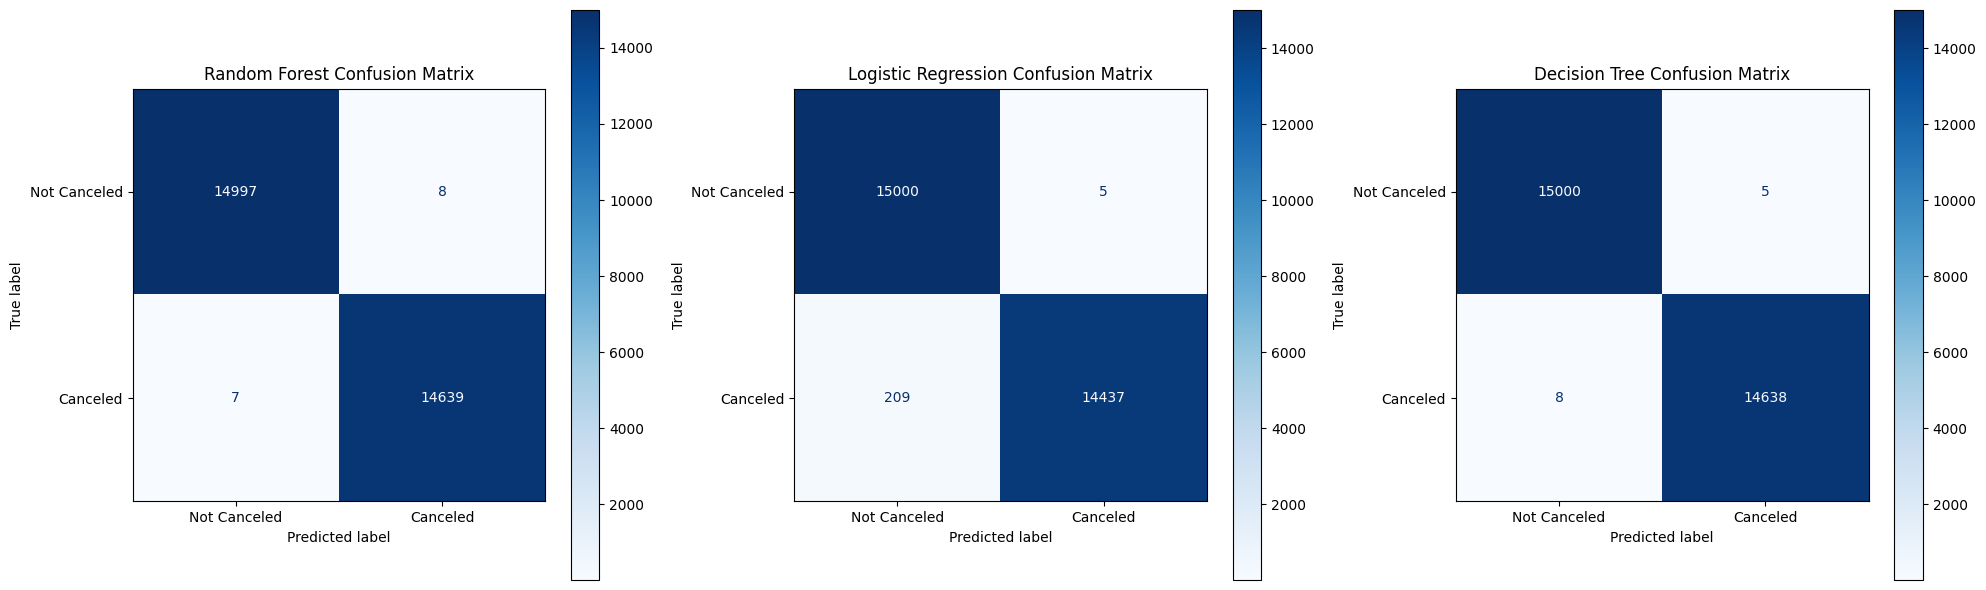

In [34]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, (clf, name) in enumerate(zip([rf_clf, lr_clf, dt_clf], ['Random Forest', 'Logistic Regression', 'Decision Tree'])):
    cm = confusion_matrix(y_test, clf.predict(X_test_scaled))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

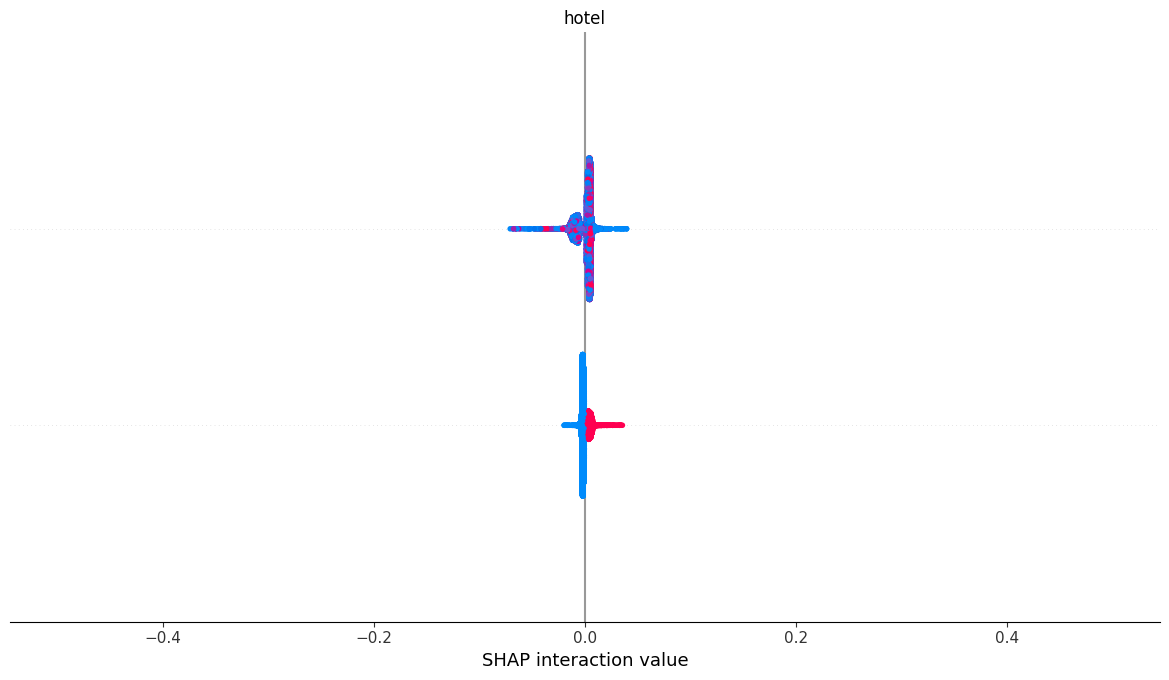

In [ ]:
# Assuming rf_clf is your RandomForestClassifier
explainer = shap.TreeExplainer(rf_clf)

# Convert to DataFrame first
X_test_df = pd.DataFrame(X_test_scaled)

# Get original feature names from X_train before scaling
feature_names = X_train.columns

# Assign original feature names to X_test_df
X_test_df.columns = feature_names 

# Compute SHAP values for all features
shap_values = explainer.shap_values(X_test_df)


C:\Users\lewis\AppData\Local\Temp\ipykernel_15100\252550906.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


<Figure size 640x480 with 0 Axes>

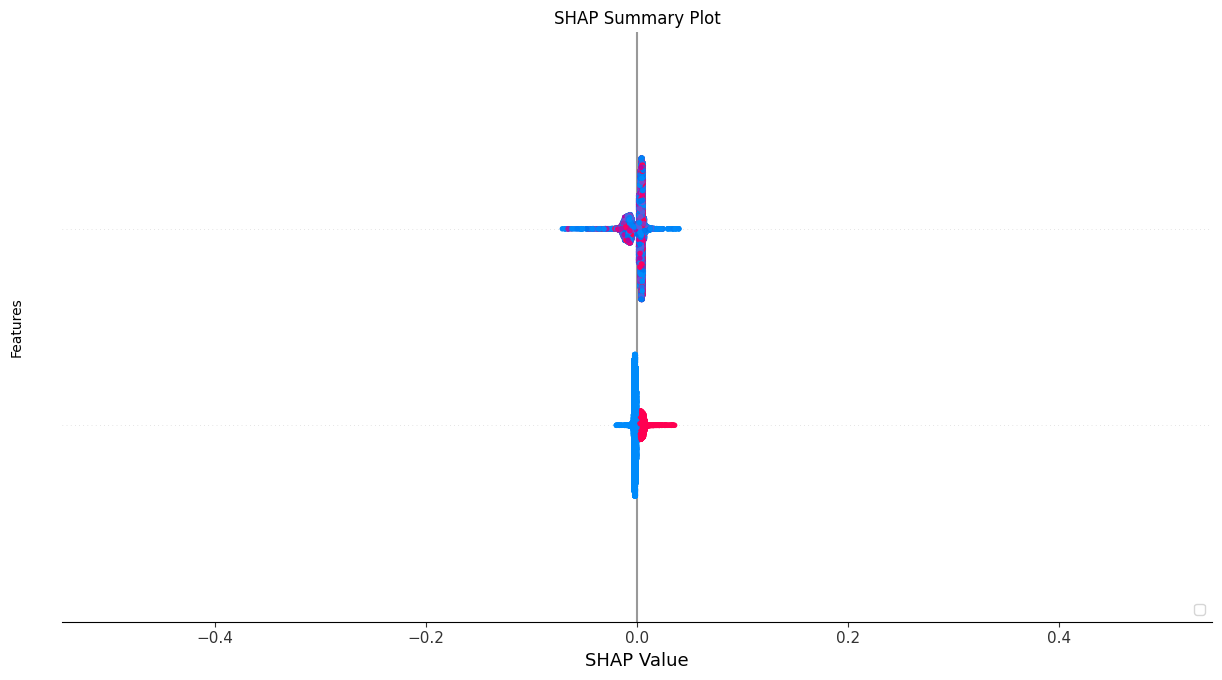

In [38]:
# Plot SHAP values with feature names as labels
shap.summary_plot(shap_values, X_test_df, feature_names=X_test_df.columns, show=False)

# Add legend and labels
plt.title('SHAP Summary Plot')
plt.xlabel('SHAP Value')
plt.ylabel('Features')
plt.legend(loc='lower right')
plt.show()

The SHAP plot provides a visualization of the contribution of each feature to the prediction of each instance in a dataset. 
The x-axis represents the SHAP value, which is a measure of the impact of a feature on the prediction. 
The y-axis lists the features. Each point on the plot is a Shapley value for a feature and an instance. 
The position on the x-axis represents whether the effect of that value is associated with a higher or lower prediction.
The color represents the value of the feature from low to high. 
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the SHAP values per feature. 
The features are ordered according to their importance, which is computed as the mean absolute Shapley value over all instances.


In [45]:
# Compute mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values).mean(axis=0)

# mean_shap_values = np.abs(shap_values).mean(axis=0)
mean_shap_values_canceled = mean_shap_values[:, 1]  # Only is_canceled=1

shap_df = pd.DataFrame(mean_shap_values_canceled, index=feature_names, columns=["SHAP"])

# Remove 'days_before_arrival' from the DataFrame as its the same as lead time
shap_df = shap_df.drop('days_before_arrival', errors='ignore')

# Sort the DataFrame by SHAP values in descending order
sorted_shap_df = shap_df.sort_values(by="SHAP", ascending=False)

# Print the sorted DataFrame
sorted_shap_df

,SHAP
deposit_type,0.040897
total_of_special_requests,0.029909
lead_time,0.017529
assigned_room_type,0.010745
booking_changes,0.008928
required_car_parking_spaces,0.008825
customer_type,0.008803
previous_cancellations,0.008008
market_segment,0.007323
adr,0.004826


Interpretation of SHAP results

The SHAP values table above provides us with the average impact of each feature on the model's output. 
The features are sorted in descending order of their SHAP values, meaning the features at the top have the most significant impact on the prediction of whether a booking will be cancelled or not.
For instance, the feature with the highest SHAP value is the most important feature in predicting booking cancellations according to our model.
